In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import dipolelosses
import potentials
import numpy as np
import pylab as plt

In [3]:
B_values = np.logspace(-3,1,50)
pot      = potentials.Silvera_Triplet
T        = 5e-4
Channels = [ ['a','a'],
             ['a','c'],
             ['a','d'],
             ['c','c'],
             ['c','d']]

LossesT=[]
LossesH=[]
for c in Channels:
    LossesT.append(dipolelosses.GetGFactor(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_values=B_values,potential=pot,temp=T))
    LossesH.append(dipolelosses.GetGFactor(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='H', B_values=B_values,potential=pot,temp=T))

/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:33: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:262: RuntimeWarning: divide by zero encountered in matmul


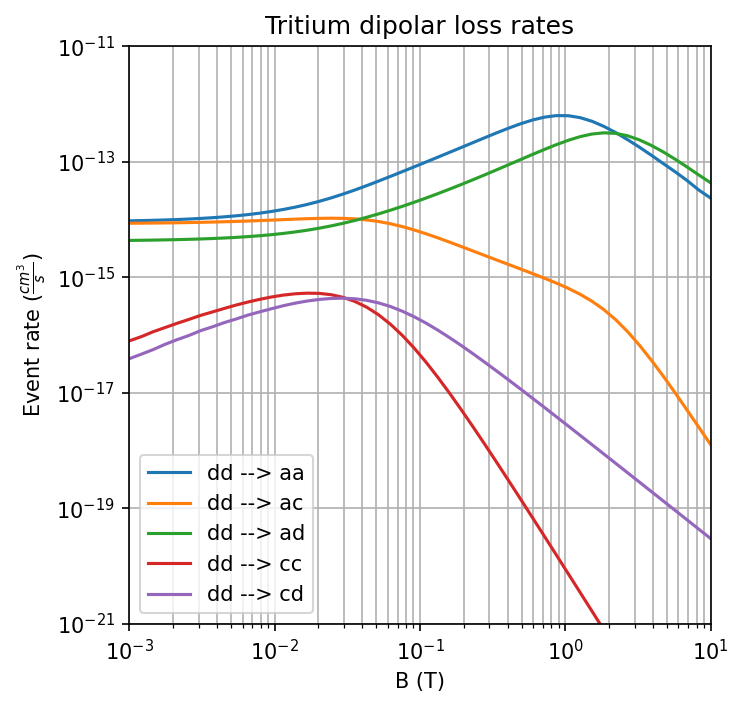

In [4]:
plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(Channels)):
    Label='dd --> '+str(Channels[ci][0])+str(Channels[ci][1])
    plt.plot(B_values,LossesT[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Tritium dipolar loss rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.show()

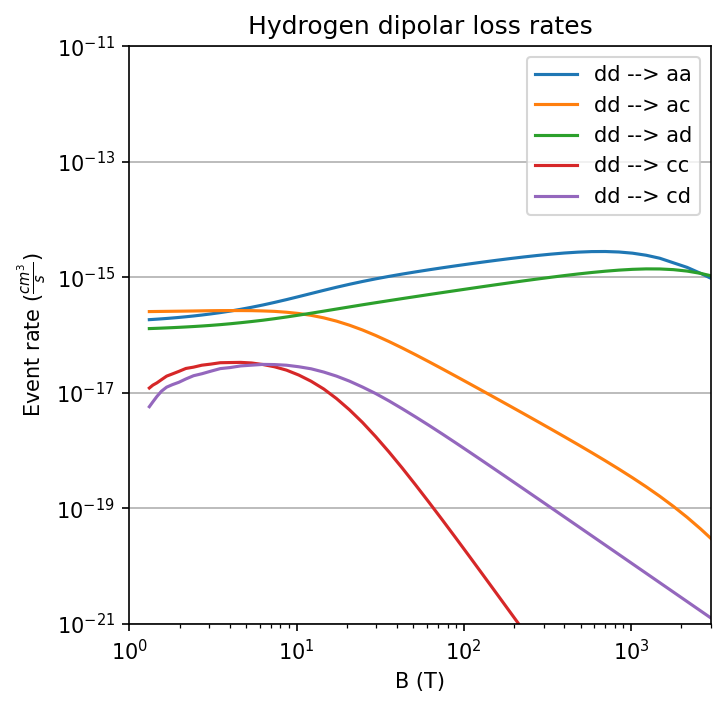

In [10]:
B_Naught = 1 + B_values/3.17e-3


plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(Channels)):
    Label='dd --> '+str(Channels[ci][0])+str(Channels[ci][1])
    plt.plot(B_Naught,LossesH[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
plt.xlim(1, 3000)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Hydrogen dipolar loss rates")
plt.grid(axis='y',which='both')
plt.legend()
plt.loglog()
plt.show()